# Retention Analysis

## Step 1. Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Step 2. Load Dataset

In [2]:
online_retail_df_url = 'https://raw.githubusercontent.com/nyangweso-rodgers/data-analytics/refs/heads/main/01-datasets/03-online-retail.csv'
online_retail_df = pd.read_csv(online_retail_df_url, encoding='unicode_escape')

# print shape of the data
print(f"online_retail_df shape: {online_retail_df.shape}")

online_retail_df.head()

online_retail_df shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom


## Step 3. Rename Columns

In [3]:
# Define the dictionary for renaming columns
new_column_names = {
    'InvoiceDate': 'InvoiceDateTime',
}

def rename_columns(df, new_column_names):
    """
    Renames columns in the DataFrame based on the provided dictionary.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    new_column_names (dict): Dictionary with current column names as keys and new names as values.
    
    Returns:
    pd.DataFrame: A DataFrame with renamed columns.
    """

    # Rename columns based on the new_column_names dictionary
    return df.rename(columns=new_column_names)

renamed_online_retail_df = rename_columns(online_retail_df, new_column_names)
renamed_online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom


__Explanation__
- `df.rename(columns=new_column_names)` function renames the columns as per the provided dictionary without modifying the original DataFrame (since Pandas' rename() returns a new DataFrame unless inplace=True is used).

## Step 4. Validate Data Types

In [4]:
def check_data_types(df):
    """
    Prints the data types of all columns in the DataFrame.
    """
    for col in df.columns:
        print(f"{col}: {df[col].dtype}")

# usage
check_data_types(renamed_online_retail_df)

InvoiceNo: object
StockCode: object
Description: object
Quantity: int64
InvoiceDateTime: object
UnitPrice: float64
CustomerID: float64
Country: object


__Explanation__
1. `for col in df.columns`: Iterates over the column names, ensuring clear and correct terminology.
2. `df[col].dtype`: Retrieves the data type of each column.

## Step 5. Transform (Change) Data Types

In [5]:
# Specify the column(s) and their desired data types
dtype_dict = {
    'InvoiceDateTime': 'datetime64[ns]',
    'CustomerID': str
}
def convert_data_types(df, dtype_dict):
    """
    Converts specified columns to the desired data types.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    dtype_dict (dict): A dictionary where keys are column names and values are target data types.
    
    Returns:
    pd.DataFrame: A DataFrame with updated data types.
    """
    df = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
    for col, dtype in dtype_dict.items():
        try:
            if dtype in [float, int]:
                # Use pd.to_numeric for numeric conversions
                df[col] = pd.to_numeric(df[col], errors='coerce').astype(dtype)
            else:
                # Use astype directly for non-numeric types
                df[col] = df[col].astype(dtype)
            print(f"Successfully converted '{col}' to {dtype}.")
        except Exception as e:
            print(f"Error converting '{col}' to {dtype}: {e}")
    return df

df_with_correct_data_types = convert_data_types(renamed_online_retail_df, dtype_dict)
check_data_types(df_with_correct_data_types)

Successfully converted 'InvoiceDateTime' to datetime64[ns].
Successfully converted 'CustomerID' to <class 'str'>.
InvoiceNo: object
StockCode: object
Description: object
Quantity: int64
InvoiceDateTime: datetime64[ns]
UnitPrice: float64
CustomerID: object
Country: object


## Step 6. Check For `null` , or `nan` Values

In [6]:
def check_null_values(df):
    """
    Function to check for null values in each column of the DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame to check for null values.
    
    Returns:
    None
    """
    # Coerce 'nan' strings and other non-standard NaNs to np.nan
    df = df.replace('nan', np.nan)
    
    # Check for empty DataFrame to avoid division by zero
    total_rows = len(df) 
    if total_rows == 0:
        print("The DataFrame is empty.")
        return pd.DataFrame(columns=['Feature', 'Count of Null Values', 'Percentage of Null Values'])
    # Calculate null counts and percentages
    null_counts = df.isnull().sum()
    null_percentage = (null_counts / total_rows) * 100
    
    # Create a DataFrame summarizing null values
    null_df = pd.DataFrame({
        'Feature': null_counts.index,
        'Count of Null Values': null_counts.values,
        'Percentage of Null Values': null_percentage.values.round(2),
    })
    # Print shape of the DataFrame dynamically
    print(f"DataFrame shape: {df.shape}")
    
    return null_df

# Check for null values in the DataFrame and get the result as a DataFrame
null_values_df = check_null_values(df_with_correct_data_types)

# Display the resulting DataFrame
null_values_df

DataFrame shape: (541909, 8)


,Feature,Count of Null Values,Percentage of Null Values
0,InvoiceNo,0,0.00
1,StockCode,0,0.00
2,Description,1454,0.27
3,Quantity,0,0.00
4,InvoiceDateTime,0,0.00
5,UnitPrice,0,0.00
6,CustomerID,135080,24.93
7,Country,0,0.00


## Step 7. Handling `null` Values

### Step 7.1: Remove `null` and `nan` Values

In [7]:
def remove_null_rows(df, columns_to_check, verbose=True):
    """
    Function to remove rows with null values in specified columns.

    Parameters:
    df (pandas.DataFrame): The DataFrame to clean.
    columns_to_check (list): List of columns to check for null values.

    Returns:
    pandas.DataFrame: A DataFrame with rows containing null values in the specified columns removed.
    """
    # Ensure the columns to check exist in the DataFrame
    missing_cols = [col for col in columns_to_check if col not in df.columns]
    if missing_cols:
        raise ValueError(f"The following columns are not in the DataFrame: {missing_cols}")
    
    # Replace non-standard null values (e.g., 'nan' as a string) with np.nan
    df = df.replace('nan', np.nan)
    
    if verbose:
        print(f"Original DataFrame shape: {df.shape}")
        
    # Drop rows with null values in the specified columns
    cleaned_df = df.dropna(subset=columns_to_check)
    
    if verbose:
        print(f"Cleaned DataFrame shape: {cleaned_df.shape}")
    
    # Handle case where the DataFrame becomes empty
    if cleaned_df.empty:
        print("Warning: The cleaned DataFrame is empty after removing rows with null values.")

    return cleaned_df

# Specify the columns to check for null values (adjust as needed)
columns_to_check = ['CustomerID', 'Description']

# Remove rows with null values in the specified columns and save the result in a new DataFrame
df_without_nulls = remove_null_rows(df_with_correct_data_types, columns_to_check)

# Display the resulting DataFrame
df_without_nulls.head()


Original DataFrame shape: (541909, 8)
Cleaned DataFrame shape: (406829, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Step 8. Check For Negative Values

In [8]:
def display_negative_values(df, columns_to_check, return_df=False):
    """
    Function to display rows with negative values in specified columns 
    and count the number of such rows for each column.

    Parameters:
    df (pandas.DataFrame): The DataFrame to check.
    columns_to_check (list): List of columns to check for negative values.
    return_df (bool): Whether to return the DataFrame with negative values.

    Returns:
    pandas.DataFrame (optional): A DataFrame with rows containing negative values 
    in the specified columns (if return_df=True).
    """
    # Validate column existence
    for col in columns_to_check:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in DataFrame.")

    # Dictionary to store column-wise negative value counts
    negative_counts = {}
    
    # Identify and count rows with negative values for each column
    for col in columns_to_check:
        negative_rows = df[df[col] < 0]
        negative_counts[col] = negative_rows.shape[0]
        print(f"Column '{col}' has {negative_rows.shape[0]} rows with negative values.")
    
    # Identify rows with negative values in any of the specified columns
    negative_values_df = df[df[columns_to_check].lt(0).any(axis=1)]
    
    # Print total rows with negative values across the specified columns
    print(f"\nTotal rows with negative values in any specified column: {negative_values_df.shape[0]}")
    
    # Optionally return the DataFrame with negative values
    if return_df:
        return negative_values_df

# Example usage:
columns_to_check_negative = ['Quantity', 'UnitPrice']
negatives = display_negative_values(df_without_nulls, columns_to_check_negative, return_df=True)

Column 'Quantity' has 8905 rows with negative values.
Column 'UnitPrice' has 0 rows with negative values.

Total rows with negative values in any specified column: 8905


### Step 8.2 Remove Negative Rows

In [9]:
def remove_negative_values(df, columns_to_check):
    """
    Function to remove rows with negative values in the specified columns 
    and return a new DataFrame. It logs the number of rows removed for each column.

    Parameters:
    df (pandas.DataFrame): The original DataFrame.
    columns_to_check (list): List of columns to check for negative values.

    Returns:
    pandas.DataFrame: A new DataFrame with rows containing negative values removed.
    """
    # Validate column existence
    for col in columns_to_check:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in DataFrame.")
    
    # Initialize total rows for logging
    initial_rows = df.shape[0]

    # Dictionary to store the number of rows deleted for each column
    rows_deleted_per_column = {}

    # Identify and log rows with negative values for each column
    for col in columns_to_check:
        negative_rows = df[df[col] < 0]
        rows_deleted_per_column[col] = negative_rows.shape[0]
        print(f"Column '{col}' had {negative_rows.shape[0]} rows with negative values.")

    # Remove rows with negative values in any of the specified columns
    cleaned_df = df[~df[columns_to_check].lt(0).any(axis=1)]

    # Calculate total rows removed
    rows_removed = initial_rows - cleaned_df.shape[0]

    # Log the summary
    print(f"\nTotal rows removed: {rows_removed}")
    print(f"New DataFrame after removing negative values has {cleaned_df.shape[0]} rows.")

    return cleaned_df

# Example usage:
columns_to_check_negative = ['Quantity', 'UnitPrice']
df_cleaned = remove_negative_values(df_without_nulls, columns_to_check_negative)

Column 'Quantity' had 8905 rows with negative values.
Column 'UnitPrice' had 0 rows with negative values.

Total rows removed: 8905
New DataFrame after removing negative values has 397924 rows.


__Exaplanation__
- It uses `df[columns_to_check].lt(0).any(axis=1)` to identify rows with negative values in any of the specified columns.
- The `~` operator negates the condition to keep only rows without negative values.

## Step : Feature Engineering

* From our data preview, we can generate the following fields:
    - `TotalAmount` = `Quantity` x `UnitPrice`
    - `Date` - extracted from the `InvoiceDate` fields
    - `DayOfWeek` from the `Date` 

In [10]:
def feature_engineering(df):
    """
    Function to perform feature engineering on the DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame to process.

    Returns:
    pandas.DataFrame: The DataFrame with additional features.
    """
    # Make a copy of the DataFrame to avoid modifying the original
    df = df.copy()

    # Ensure necessary columns exist
    required_columns = ['InvoiceDateTime', 'UnitPrice', 'Quantity']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")

    # Handle missing values in InvoiceDateTime, UnitPrice, and Quantity
    df = df.dropna(subset=required_columns)

    # Extract the date from InvoiceDateTime
    df['InvoiceDate'] = df['InvoiceDateTime'].dt.date

    # Calculate InvoiceAmount as the product of UnitPrice and Quantity
    df['InvoiceAmount'] = df['UnitPrice'] * df['Quantity']

    # Extract the day of the week (using dt accessor for better performance)
    df['InvoiceDayOfWeek'] = df['InvoiceDateTime'].dt.day_name()

    # Create InvoiceMonth column (using dt accessor for better performance)
    df['InvoiceMonth'] = df['InvoiceDateTime'].dt.to_period('M').dt.to_timestamp()

    return df

# Perform feature engineering on the cleaned DataFrame
enhanced_df = feature_engineering(df_cleaned)
enhanced_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,InvoiceAmount,InvoiceDayOfWeek,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30,Wednesday,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,Wednesday,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00,Wednesday,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,Wednesday,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,Wednesday,2010-12-01


## Step : Descriptive Statistics

In [11]:
# descriptive statistics function
def descriptive_statistic(df):
    # Specifying datetime_is_numeric=True adopts the future behavior of Treating datetime data as categorical rather than numeric
    return df.describe(include='all')
 

descriptive_statistic(enhanced_df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,InvoiceAmount,InvoiceDayOfWeek,InvoiceMonth
count,397924,397924,397924,397924.000000,397924,397924.000000,397924,397924,397924,397924.000000,397924,397924
unique,18536,3665,3877,NaN,NaN,NaN,4339,37,305,NaN,6,NaN
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,17841.0,United Kingdom,2011-11-06,NaN,Thursday,NaN
freq,542,2035,2028,NaN,NaN,NaN,7847,354345,3423,NaN,80052,NaN
mean,NaN,NaN,NaN,13.021823,2011-07-10 23:43:36.912475648,3.116174,NaN,NaN,NaN,22.394749,NaN,2011-06-26 09:28:46.267327488
min,NaN,NaN,NaN,1.000000,2010-12-01 08:26:00,0.000000,NaN,NaN,NaN,0.000000,NaN,2010-12-01 00:00:00
25%,NaN,NaN,NaN,2.000000,2011-04-07 11:12:00,1.250000,NaN,NaN,NaN,4.680000,NaN,2011-04-01 00:00:00
50%,NaN,NaN,NaN,6.000000,2011-07-31 14:39:00,1.950000,NaN,NaN,NaN,11.800000,NaN,2011-07-01 00:00:00
75%,NaN,NaN,NaN,12.000000,2011-10-20 14:33:00,3.750000,NaN,NaN,NaN,19.800000,NaN,2011-10-01 00:00:00
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,8142.750000,NaN,NaN,NaN,168469.600000,NaN,2011-12-01 00:00:00


### Step : Descriptive Statistics By Customer

In [12]:
def summary_by_customer(df):
    # Ensure necessary columns exist
    required_columns = ['InvoiceNo', 'InvoiceAmount', 'StockCode', 'Description']
    
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")
        
    # Group by country and calculate required statistics
    summary_by_customer = df.groupby(['Country', 'CustomerID', 'InvoiceMonth', 'InvoiceDate']).agg(
        TotalInvoiceAmount=('InvoiceAmount', 'sum'),
        InvoicesCount=('InvoiceNo', 'nunique'),
        StockCodeCount=('StockCode', 'nunique'),
        ProductsDescriptionCount=('Description', 'nunique')
    ).reset_index()
    
    return summary_by_customer

customer_summary_df = summary_by_customer(enhanced_df)
customer_summary_df

,Country,CustomerID,InvoiceMonth,InvoiceDate,TotalInvoiceAmount,InvoicesCount,StockCodeCount,ProductsDescriptionCount
0,Australia,12386.0,2010-12-01,2010-12-08,258.90,1,8,8
1,Australia,12386.0,2011-01-01,2011-01-06,143.00,1,2,2
2,Australia,12388.0,2011-01-01,2011-01-17,431.30,1,19,19
3,Australia,12388.0,2011-02-01,2011-02-07,124.05,1,6,6
4,Australia,12388.0,2011-03-01,2011-03-09,210.90,1,10,10
...,...,...,...,...,...,...,...,...
16761,Unspecified,12743.0,2011-07-01,2011-07-28,546.43,2,114,114
16762,Unspecified,14265.0,2011-07-01,2011-07-14,252.05,1,15,15
16763,Unspecified,14265.0,2011-08-01,2011-08-22,278.13,1,16,16
16764,Unspecified,16320.0,2011-05-01,2011-05-10,852.68,1,47,47


# Retention Analysis

## Weekly Cohort Retention

## Monthly Cohort Retention

- Creating a function to calculate monthly cohort retention involves the following steps:
    1. Assign Cohort Labels: Assign a cohort label to each customer based on their first purchase month.
    2. Calculate Retention: Determine the number of customers retained in each subsequent month.

In [13]:
def calculate_monthly_cohort_retention(df):
    """
    Calculate monthly cohort retention for CustomerID.

    Parameters:
    df (pandas.DataFrame): The DataFrame with the feature-engineered data.

    Returns:
    pandas.DataFrame: Cohort retention table.
    """

    # create a dataframe with CustomerID and InvoiceYearMonth
    monthly_customer_df = df[['CustomerID', 'InvoiceMonth']].drop_duplicates()

    # print shape of the data
    print(f"Monthly customer dataset shape: {monthly_customer_df.shape}")

    # Aggregate data to get the first purchase month for each customer
    customer_first_invoice_df = df.groupby(['CustomerID']).agg(
        FirstInvoiceMonth = pd.NamedAgg(column="InvoiceMonth",  aggfunc='min'),
        FirstInvoiceDate = pd.NamedAgg(column="InvoiceDate", aggfunc='min')
    ).reset_index()

    # Merge back with the original data to get the FirstPurchaseMonth for each record
    monthly_customer_df = monthly_customer_df.merge(customer_first_invoice_df[['CustomerID','FirstInvoiceDate', 'FirstInvoiceMonth']], on='CustomerID')

    # Ensure the FirstInvoiceMonth column is in datetime format
    monthly_customer_df['FirstInvoiceMonth'] = pd.to_datetime(monthly_customer_df['FirstInvoiceMonth'])

    # Calculate cohort index
    monthly_customer_df['CohortIndex'] = (monthly_customer_df['InvoiceMonth'].dt.to_period('M') - 
                                           monthly_customer_df['FirstInvoiceMonth'].dt.to_period('M')).apply(lambda x: x.n)
    
    return  monthly_customer_df
customer_country_data = calculate_monthly_cohort_retention(customer_summary_df)
customer_country_data.head()

Monthly customer dataset shape: (13055, 2)


,CustomerID,InvoiceMonth,FirstInvoiceDate,FirstInvoiceMonth,CohortIndex
0,12386.0,2010-12-01,2010-12-08,2010-12-01,0
1,12386.0,2011-01-01,2010-12-08,2010-12-01,1
2,12388.0,2011-01-01,2011-01-17,2011-01-01,0
3,12388.0,2011-02-01,2011-01-17,2011-01-01,1
4,12388.0,2011-03-01,2011-01-17,2011-01-01,2


- Remark: 
    - Test Output: Test with one `CustomerID`

In [16]:
TestCustomerId = ['17841.0']
TestCustomerIdOutput = customer_country_data[ (customer_country_data['CustomerID'] == TestCustomerId[0])]
TestCustomerIdOutput

,CustomerID,InvoiceMonth,FirstInvoiceDate,FirstInvoiceMonth,CohortIndex
12123,17841.0,2010-12-01,2010-12-01,2010-12-01,0
12124,17841.0,2011-01-01,2010-12-01,2010-12-01,1
12125,17841.0,2011-02-01,2010-12-01,2010-12-01,2
12126,17841.0,2011-03-01,2010-12-01,2010-12-01,3
12127,17841.0,2011-04-01,2010-12-01,2010-12-01,4
12128,17841.0,2011-05-01,2010-12-01,2010-12-01,5
12129,17841.0,2011-06-01,2010-12-01,2010-12-01,6
12130,17841.0,2011-07-01,2010-12-01,2010-12-01,7
12131,17841.0,2011-08-01,2010-12-01,2010-12-01,8
12132,17841.0,2011-09-01,2010-12-01,2010-12-01,9


In [15]:
customer_country_data.dtypes

CustomerID                   object
InvoiceMonth         datetime64[ns]
FirstInvoiceDate             object
FirstInvoiceMonth    datetime64[ns]
CohortIndex                   int64
dtype: object

In [17]:
def generate_cohort_counts(df):
    """
    Generate a cohort counts pivot table.

    Parameters:
    df (pandas.DataFrame): The DataFrame with the cohort data.

    Returns:
    pandas.DataFrame: Cohort counts pivot table.
    """
    cohort_counts = df.pivot_table(index='FirstInvoiceMonth', 
                                   columns='CohortIndex', 
                                   values='CustomerID', 
                                   aggfunc='count')
    return cohort_counts

# Example usage
cohort_counts = generate_cohort_counts(customer_country_data)
cohort_counts

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstInvoiceMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
def generate_cohort_percentage(df):
    """
    Generate a cohort retention percentage pivot table.

    Parameters:
    df (pandas.DataFrame): The DataFrame with the cohort data.

    Returns:
    pandas.DataFrame: Cohort retention percentage pivot table.
    """
    cohort_counts = generate_cohort_counts(df)
    
    cohort_sizes = cohort_counts.iloc[:, 0]
    retention_matrix = cohort_counts.divide(cohort_sizes, axis=0)

    # Format values as percentages using map
    retention_matrix = retention_matrix.map(lambda x: f"{x:.2%}")

    return retention_matrix

# Example usage
cohort_retention = generate_cohort_percentage(customer_country_data)
cohort_retention

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstInvoiceMonth,,,,,,,,,,,,,
2010-12-01,100.00%,36.61%,32.32%,38.42%,36.27%,39.77%,36.27%,34.92%,35.37%,39.55%,37.40%,50.28%,26.55%
2011-01-01,100.00%,22.06%,26.62%,23.02%,32.13%,28.78%,24.70%,24.22%,29.98%,32.61%,36.45%,11.75%,nan%
2011-02-01,100.00%,18.68%,18.68%,28.42%,27.11%,24.74%,25.26%,27.89%,24.74%,30.53%,6.84%,nan%,nan%
2011-03-01,100.00%,15.04%,25.22%,19.91%,22.35%,16.81%,26.77%,23.01%,27.88%,8.63%,nan%,nan%,nan%
2011-04-01,100.00%,21.33%,20.33%,21.00%,19.67%,22.67%,21.67%,26.00%,7.33%,nan%,nan%,nan%,nan%
2011-05-01,100.00%,19.01%,17.25%,17.25%,20.77%,23.24%,26.41%,9.51%,nan%,nan%,nan%,nan%,nan%
2011-06-01,100.00%,17.36%,15.70%,26.45%,23.14%,33.47%,9.50%,nan%,nan%,nan%,nan%,nan%,nan%
2011-07-01,100.00%,18.09%,20.74%,22.34%,27.13%,11.17%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
2011-08-01,100.00%,20.71%,24.85%,24.26%,12.43%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%


## Visualization 
### Monthly Customer Cohort Retention Heatmap

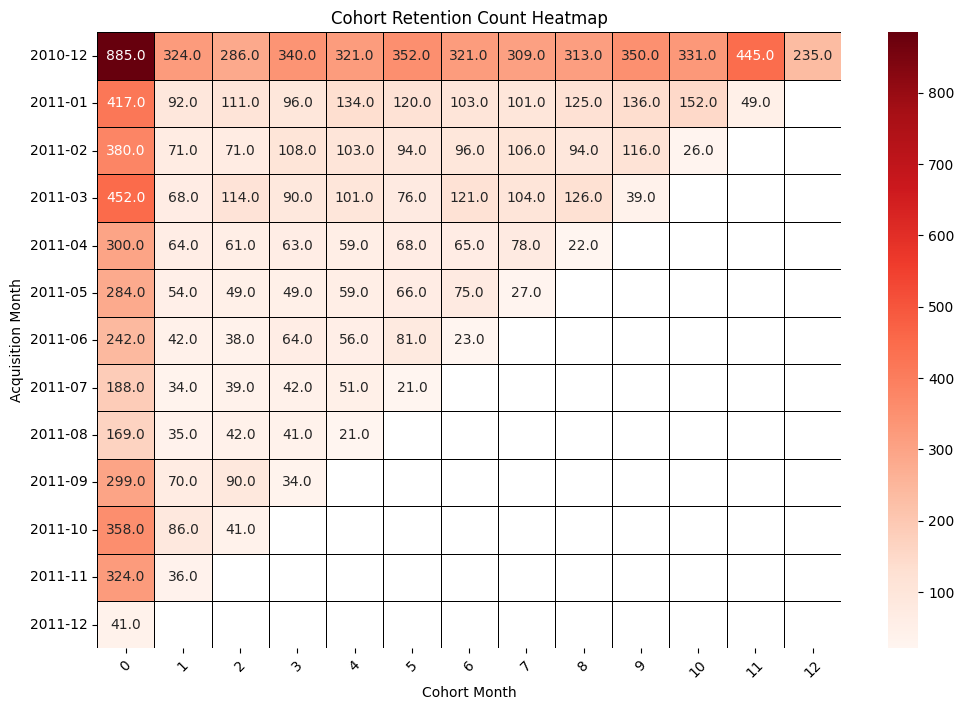

In [19]:
def plot_cohort_count_heatmap(df):
    """
    Plot a heatmap for the cohort counts with values formatted to 1 decimal place.

    Parameters:
    df (pandas.DataFrame): The DataFrame with the cohort retention counts.

    Returns:
    None
    """
    # Generate cohort count data
    cohort_retention_counts = generate_cohort_counts(df)

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(cohort_retention_counts, annot=True, fmt='.1f', cmap='Reds', cbar=True, linewidths=0.5, linecolor='black')
    plt.title('Cohort Retention Count Heatmap')
    plt.xlabel('Cohort Month')
    plt.ylabel('Acquisition Month')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    # Format y-axis labels
    y_labels = cohort_retention_counts.index.to_series().dt.to_period('M').astype(str)
    ax.set_yticklabels(y_labels, rotation=0)
    
    plt.show()

# Example usage
plot_cohort_count_heatmap(customer_country_data)

__Explanations__
- Plot Heatmap:
  - `sns.heatmap` plots the heatmap with `annot=True` to display the values on the heatmap cells. `fmt='.1f'` ensures that the values are formatted to 1 decimal place.
- Formatting Values in Heatmap:
  - `fmt='.1f'` ensures that the heatmap values are displayed with 1 decimal place. Even though these are counts, it's a good practice for consistency and readability.

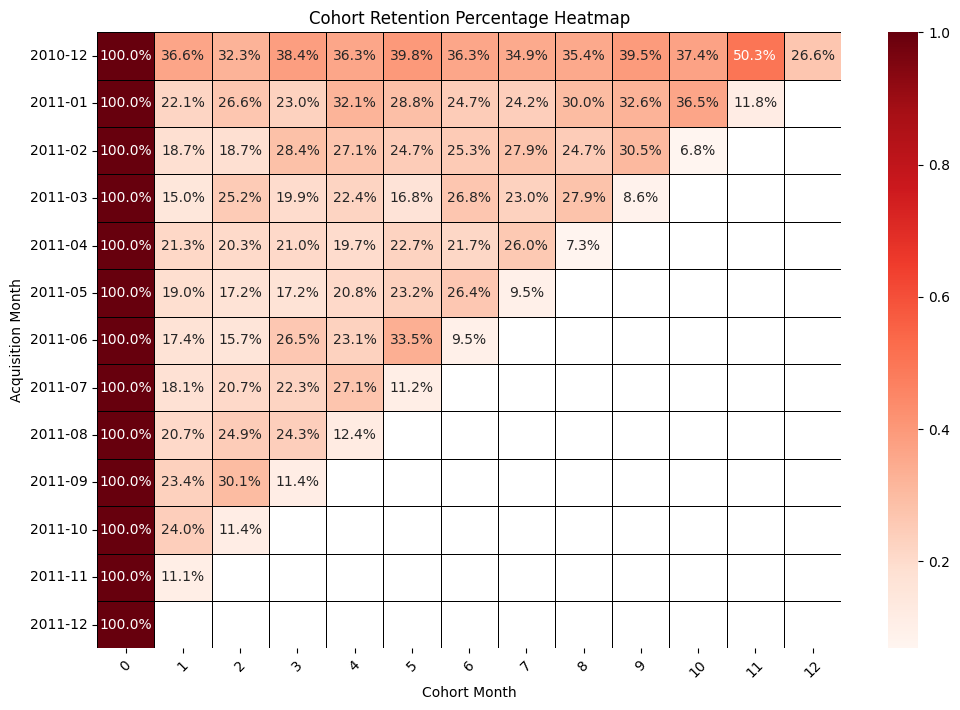

In [20]:
def plot_cohort_percentage_heatmap(df):
    """
    Plot a heatmap for the cohort retention percentages with values formatted to 1 decimal place.

    Parameters:
    df (pandas.DataFrame): The DataFrame with the cohort retention percentages.

    Returns:
    None
    """
    # Generate cohort percentage data
    cohort_retention = generate_cohort_percentage(df)

    # Convert percentage strings back to numeric values for heatmap plotting
    # Remove '%' and convert to float
    cohort_retention_numeric = cohort_retention.replace({'%': ''}, regex=True).astype(float) / 100

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(cohort_retention_numeric, annot=True, fmt='.1%', cmap='Reds', cbar=True, linewidths=0.5, linecolor='black')
    plt.title('Cohort Retention Percentage Heatmap')
    plt.xlabel('Cohort Month')
    plt.ylabel('Acquisition Month')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    # Format y-axis labels
    y_labels = cohort_retention_numeric.index.to_series().dt.to_period('M').astype(str)
    ax.set_yticklabels(y_labels, rotation=0)
    
    plt.show()

# Example usage
plot_cohort_percentage_heatmap(customer_country_data)

# save the figure
#fig.savefig("Image_of_Monthly_Cohort_Retention_Rate.png")

# Resources and Further Reading
1. 